In [1]:
import torch
import matplotlib.pyplot as plt

from data_class import DataClass
from linear_noise_scheduler import LinearNoiseScheduler
from model import UNet, sample_images, sample_image_timesteps

In [2]:
in_ch = 1
out_ch = 1
time_dim = 256
IMG_SIZE = 64
BATCH_SIZE = 12
NUM_IMAGES = 1000
T = 500
device = 'cuda' if torch.cuda.is_available() else 'cpu'
output_dir = r'./outputs'

data_class = DataClass(BATCH_SIZE, IMG_SIZE, NUM_IMAGES)
dataloader = data_class.load_transformed_dataset()

In [3]:
model = UNet(in_ch, out_ch, time_dim, device).to(device)
scheduler = LinearNoiseScheduler(timesteps=T, device=device)
model.load_state_dict(torch.load('/workspace/diffusion/model_epoch_2000.pt', map_location=device))
print(f"{sum(p.numel() for p in model.parameters()) / 10**6}M parameters")

23.331457M parameters


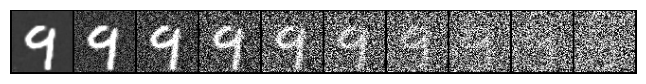

In [7]:
out = sample_image_timesteps(model, scheduler)
data_class.show_tensor_image(out, nrow=10)

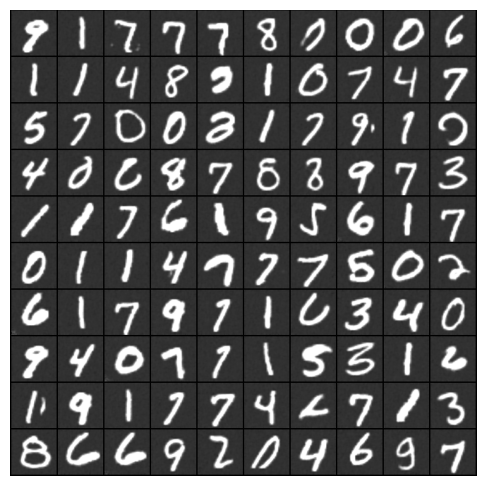

In [5]:
out = sample_images(model, scheduler, n=100)
data_class.show_tensor_image(out, nrow=10)